# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
df = pd.read_csv('signnames.csv')
n_classes = df.shape[0]
signName_list = df["SignName"].values

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Show each class of image example

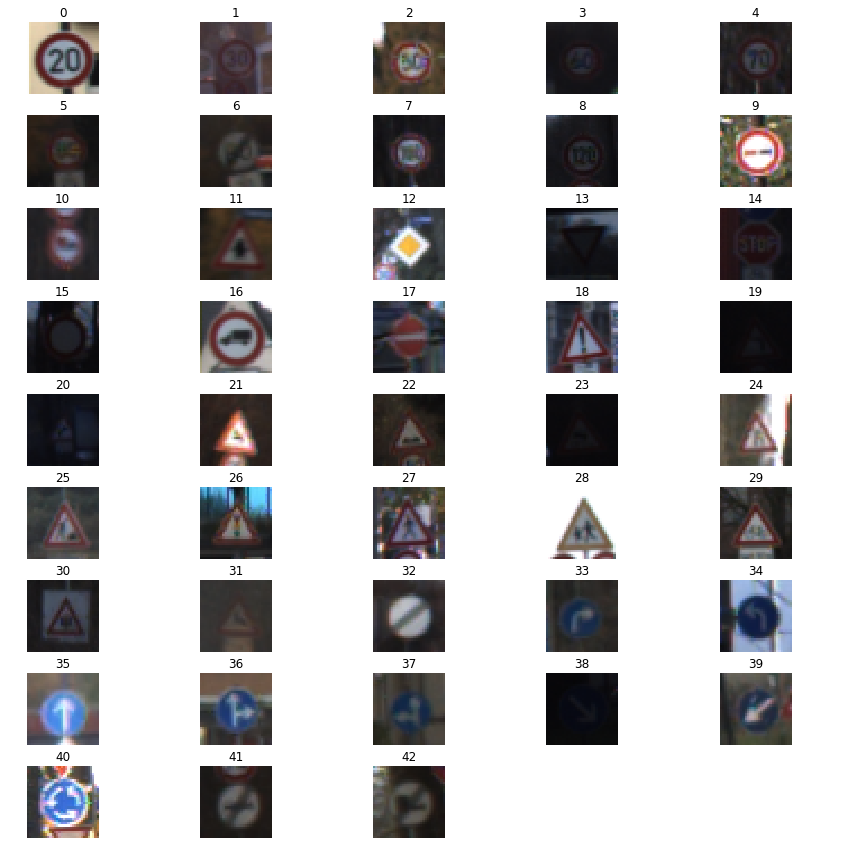

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show and count each class of images
fig, ax = plt.subplots(9, 5, figsize=(15,15))

num_of_each_class = []

for i in range(0, n_classes):
    row = int(i/5)
    col = i%5    
    x_images = X_train[y_train == i]
    ax[row, col].imshow(x_images[0, :, :, :]) #draw the first image of each class
    ax[row, col].set_title(i)
    ax[row, col].axis('off')
    num_of_each_class.append(len(x_images))
    
ax[8, 3].axis('off')
ax[8, 4].axis('off')

fig.subplots_adjust(hspace=0.3)
plt.show()

#### The information of traning dataset

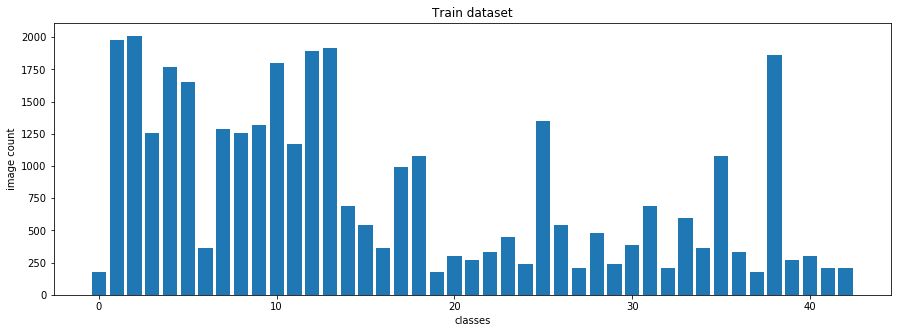

class 0: 180
class 1: 1980
class 2: 2010
class 3: 1260
class 4: 1770
class 5: 1650
class 6: 360
class 7: 1290
class 8: 1260
class 9: 1320
class 10: 1800
class 11: 1170
class 12: 1890
class 13: 1920
class 14: 690
class 15: 540
class 16: 360
class 17: 990
class 18: 1080
class 19: 180
class 20: 300
class 21: 270
class 22: 330
class 23: 450
class 24: 240
class 25: 1350
class 26: 540
class 27: 210
class 28: 480
class 29: 240
class 30: 390
class 31: 690
class 32: 210
class 33: 599
class 34: 360
class 35: 1080
class 36: 330
class 37: 180
class 38: 1860
class 39: 270
class 40: 300
class 41: 210
class 42: 210

min:  180
max:  2010


In [4]:
# Show dustribution of training dataset
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(range(0, n_classes), num_of_each_class)
ax.set_xlabel('classes')
ax.set_ylabel('image count')
ax.set_title('Train dataset')

plt.show()

for i, x in enumerate(num_of_each_class):
    print("class " + str(i) + ": " + str(x))

print()
print("min: ", min(num_of_each_class))
print("max: ", max(num_of_each_class))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Image processing function

Reference:

[Geometric Transformations of Images](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations)

[Histogram Equalization](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)

In [5]:
# function with image processing
import cv2
import numpy as np
import random

def zoom(img):
    center_x = int(img.shape[0]/2)
    center_y = int(img.shape[1]/2)
    shift = random.randrange(10, 16)
    img = img[(center_x-shift):(center_x+shift),(center_y-shift):(center_y+shift)]
    return cv2.resize(img, (32, 32))

def rotate(img):
    rows,cols = img.shape[:2]
    center_x = int(rows/2)
    center_y = int(cols/2)
    angle = random.randrange(-20, 20)
    rotate_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, scale=1.0)
    return cv2.warpAffine(img, rotate_matrix, (cols, rows))

def translation(img):
    rows,cols = img.shape[:2]
    tr_x = random.uniform(-5, 5)
    tr_y = random.uniform(-5, 5)
    trans_matrix = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    return cv2.warpAffine(img, trans_matrix, (cols, rows))

def affine_transformation(img):
    rows,cols = img.shape[:2]    
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    point1 = random.randrange(3, 8)
    point2 = random.randrange(17, 23)    
    pts2 = np.float32([[point1,5],[point2,point1],[5,point2]])    
    matrix = cv2.getAffineTransform(pts1,pts2)
    return cv2.warpAffine(img, matrix, (cols, rows))

def grayscale(img):
    img_gray =  cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    new_img = np.resize(img_gray, (32, 32, 1))
    return new_img

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
    return img_output

def clahe(img):
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    new_img = np.resize(cl1, (32, 32, 1))
    return new_img

#### Test each image processing function

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 1)
(32, 32, 1)


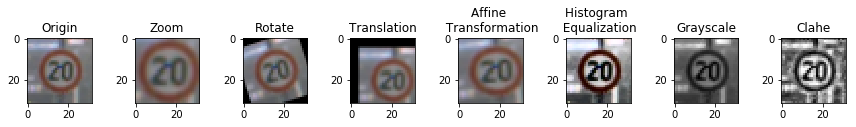

In [6]:
#Show sample image process result

plt.figure(figsize=(12, 6))

plot_row = 1
plot_col = 8

image = X_train[10000]
print(image.shape)

plt.subplot(plot_row, plot_col, 1)
plt.imshow(image)
plt.title("Origin")

img_zoom = zoom(image)
print(img_zoom.shape)
plt.subplot(plot_row, plot_col, 2)
plt.imshow(img_zoom)
plt.title("Zoom")

img_rotate = rotate(image)
print(img_rotate.shape)
plt.subplot(plot_row, plot_col, 3)
plt.imshow(img_rotate)
plt.title("Rotate")

img_translation = translation(image)
print(img_translation.shape)
plt.subplot(plot_row, plot_col, 4)
plt.imshow(img_translation)
plt.title("Translation")

img_affine_transformation = affine_transformation(image)
print(img_affine_transformation.shape)
plt.subplot(plot_row, plot_col, 5)
plt.imshow(img_affine_transformation)
plt.title("Affine \n Transformation")

img_histo_eq = histogram_equalization(image)
print(img_histo_eq.shape)
plt.subplot(plot_row, plot_col, 6)
plt.imshow(img_histo_eq)
plt.title("Histogram \n Equalization")

img_gray = grayscale(image)
print(img_gray.shape)
plt.subplot(plot_row, plot_col, 7)
plt.imshow(img_gray.squeeze(), cmap='gray')
plt.title("Grayscale")

img_clahe = clahe(grayscale(image))
print(img_clahe.shape)
plt.subplot(plot_row, plot_col, 8)
plt.imshow(img_clahe.squeeze(), cmap='gray')
plt.title("Clahe")

plt.tight_layout()
plt.show()

### Data Augmentation

In order to balance dataset in each class, creating more data from existing data by doing zooming, rotate, translate and affine transformation randomly.

In [7]:
# Transform Image
def image_transform(img):
    con = random.randrange(0, 1)
    if con is 0:
        return affine_transformation(img)
    elif con is 1:
        img_zoom = zoom(img)
        img_rotate = rotate(img_zoom)
        img_translation = translation(img_rotate)
        return img_translation
    else:
        return img

#### Test image transformation

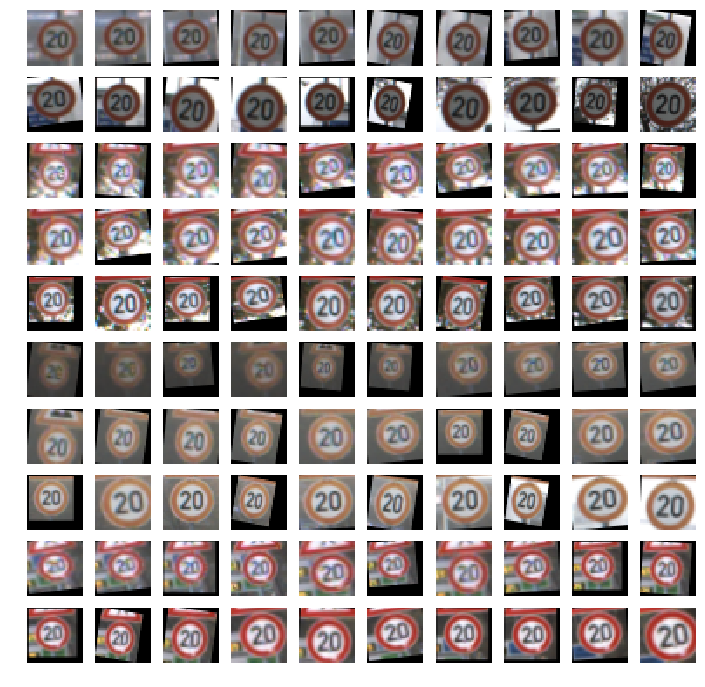

In [8]:
import matplotlib.gridspec as gridspec # Another method to show gridview.

grid = gridspec.GridSpec(10, 10)
grid.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax = plt.subplot(grid[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    img = image_transform(X_train[10000 + i])

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

#### Augment Data

Set minimum count of images in each class to 1000. Now we get 16891 new samples in the training dataset.

In [9]:
# Add data
from numpy import array

MIN_DATA_COUNT = 1000

X_train_aug = []
y_train_aug = []

for i in range(0, n_classes):
    x_images = X_train[y_train == i]
    x_images_count = len(x_images)
    if x_images_count < MIN_DATA_COUNT:
        augment_count = MIN_DATA_COUNT - x_images_count
        print("class ", i , " has ", x_images_count, " images, add " , augment_count, "images")
        for j in range(augment_count):
            index = j % x_images_count
            img_trans = image_transform(x_images[index, :, :, :])
            X_train_aug.append(img_trans)
            y_train_aug.append(i)

print()
print('Original training dataset count: ', len(X_train))

X_train_aug = array(X_train_aug)
y_train_aug = array(y_train_aug)

print('Create images count: ', len(X_train_aug))

X_train = np.concatenate((X_train, X_train_aug), axis=0)
y_train = np.concatenate((y_train, y_train_aug), axis=0)

print('Now training dataset count: ', len(X_train))

class  0  has  180  images, add  820 images
class  6  has  360  images, add  640 images
class  14  has  690  images, add  310 images
class  15  has  540  images, add  460 images
class  16  has  360  images, add  640 images
class  17  has  990  images, add  10 images
class  19  has  180  images, add  820 images
class  20  has  300  images, add  700 images
class  21  has  270  images, add  730 images
class  22  has  330  images, add  670 images
class  23  has  450  images, add  550 images
class  24  has  240  images, add  760 images
class  26  has  540  images, add  460 images
class  27  has  210  images, add  790 images
class  28  has  480  images, add  520 images
class  29  has  240  images, add  760 images
class  30  has  390  images, add  610 images
class  31  has  690  images, add  310 images
class  32  has  210  images, add  790 images
class  33  has  599  images, add  401 images
class  34  has  360  images, add  640 images
class  36  has  330  images, add  670 images
class  37  ha

#### The New Training Dataset Distribution

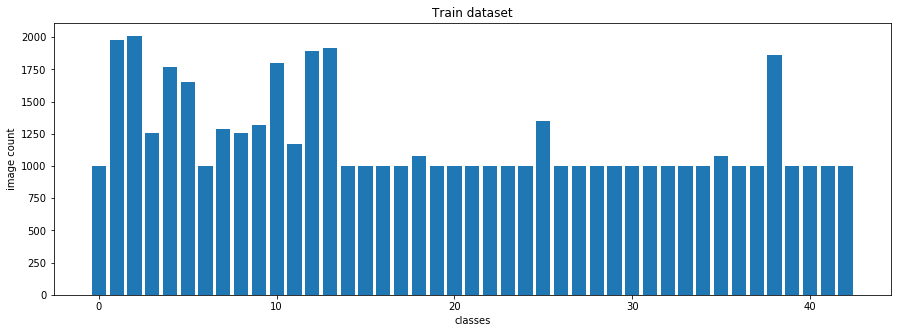

In [10]:
# Check dataset again

num_of_each_class = []

for i in range(0, n_classes):
    x_images = X_train[y_train == i]
    num_of_each_class.append(len(x_images))

# Show dustribution of training dataset
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(range(0, n_classes), num_of_each_class)
ax.set_xlabel('classes')
ax.set_ylabel('image count')
ax.set_title('Train dataset')

plt.show()

### Image Preprocessing

There are 2 main steps need to do.
1. Histogram Equalization
2. Normalization

Histogram equalization uses different functions between grayscale image and color image. Without doing histogram equalizing, the accuracy always stops at 0.89, after doing this step, the accuracy will rise to at least 0.91.

Before histogram equalization we need to decide to transform images to grayscale or not. About this question, I got same accuracy between grayscale and color images. Therefore, I do not transform images to grayscale.

In [11]:
# image normalize function
def normalize(image):
    if ISGRAY is True:
        dst = np.zeros((32, 32, 1))
    else:
        dst = np.zeros((32, 32, 3))
    norm_image = cv2.normalize(image, dst, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    if ISGRAY is True:
        norm_image = np.resize(norm_image, (32, 32, 1))
    return norm_image

In [12]:
# Set this flag to decide if need to transform all images to grayscale.
ISGRAY = False

if ISGRAY is True: # grayscale and clahe
    # train
    X_train_gray = []
    for x_img in X_train:
        x_img_gray = grayscale(x_img)
        x_img_clahe = clahe(x_img_gray)
        X_train_gray.append(x_img_clahe)
    X_train = X_train_gray
    
    # valid
    X_valid_gray = []
    for x_img in X_valid:
        x_img_gray = grayscale(x_img)
        x_img_clahe = clahe(x_img_gray)
        X_valid_gray.append(x_img_clahe)
    X_valid = X_valid_gray
    
    # test
    X_test_gray = []
    for x_img in X_test:
        x_img_gray = grayscale(x_img)
        x_img_clahe = clahe(x_img_gray)
        X_test_gray.append(x_img_clahe)
    X_test = X_test_gray
else:  # Histogram Equalization
    # train
    X_train_color = []
    for x_img in X_train:
        x_img_histo_equal = histogram_equalization(x_img) 
        X_train_color.append(x_img_histo_equal)
    X_train = X_train_color
    
    # valid
    X_valid_color = []
    for x_img in X_valid:
        x_img_histo_equal = histogram_equalization(x_img) 
        X_valid_color.append(x_img_histo_equal)
    X_valid = X_valid_color
    
    # test
    X_test_color = []
    for x_img in X_test:
        x_img_histo_equal = histogram_equalization(x_img) 
        X_test_color.append(x_img_histo_equal)
    X_test = X_test_color



# Normalization
X_train_normalize = []

for x_img in X_train:
    x_img_normalize = normalize(x_img) # Normalization
    X_train_normalize.append(x_img_normalize)

X_train = X_train_normalize

#### Check result after histogram equalization

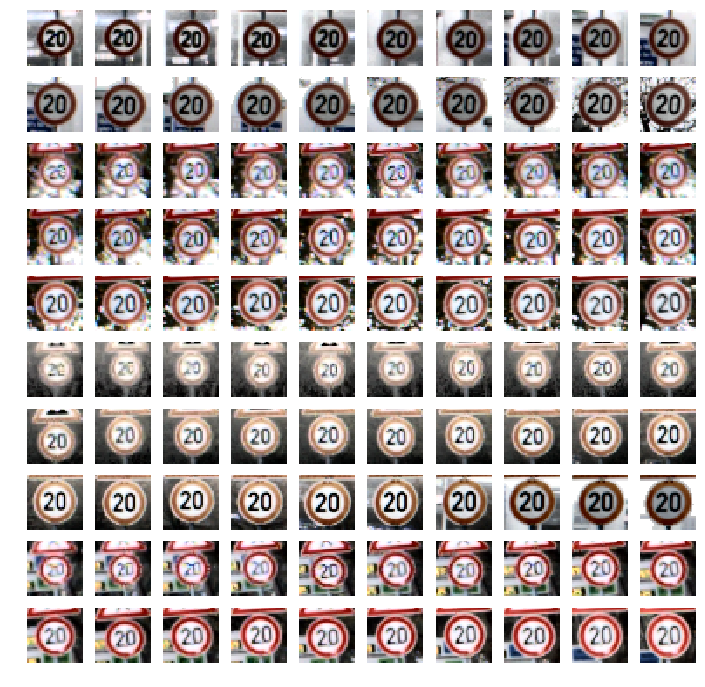

In [13]:
grid = gridspec.GridSpec(10, 10)
grid.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax = plt.subplot(grid[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    img = X_train[10000 + i]

    plt.subplot(10,10,i+1)
    if ISGRAY is True:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img)
    plt.axis('off')

plt.show()

#### Shuffle training dataset

In [14]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

I use LeNet as my model but modified 2 parts.
1. Modified the depth of convolution layer.
    - covolution layer 1: 6 -> 16
    - convolution layer2: 16 -> 32
    
    When modified the depth, remember that the fully-connected layer output also need to be changed.
    
    After this step, the accuracy will be raised from 0.91 to 0.93.
2. Add dropout function in fully-connected layer.

    I tried to add dropout function in convolution layer, but the accuracy is down to about 0.75; then I put dropout function in fully-connected layer. The accuracy will increase to 0.95. Moreover, the probability of dropout 0.6 will have the best accuracy, but 0.5 and 0.7 also got closely result.
    
| Layer    	                |     Description            | Output    | 
|:-------------------------:|:--------------------------:|:---------:| 
| Input       	            | RGB Image  	             | 32X32X3   |
| Convolution Layer 1 (5X5) | strides 1X1, valid padding | 28X28X16  |
| Relu       	            |   			             |           |
| Max Pooling       	    | 2X2  			             | 14X14X16  |
| Convolution Layer 2 (5X5) | strides 1X1, valid padding | 10X10X32  |
| Relu       	            |   			             |           |
| Max Pooling       	    | 2X2   			         | 5X5X32    |
| Flatten      	            |   			             |           |
| Fully-connected Layer 1   |   			             | 360       |
| Relu       	            |   			             |           |
| Dropout       	        | 0.6 keep probability       |           |
| Fully-connected Layer 2   |   			             | 120       | 
| Relu       	            |   			             |           |
| Dropout      	            | 0.6 keep probability       |		     | 
| Fully-connected Layer 3   |   			             | 43        |

In [15]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

#parameters for grayscale or rgb

if ISGRAY is True:
    CHANNEL = 1
else:
    CHANNEL = 3

In [16]:
from tensorflow.contrib.layers import flatten

def MyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, CHANNEL, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1, name = 'av1')

    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
#     conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2, name = 'av2')

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
#     conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 360.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 360), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(360))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 360. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(360, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = class(43).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
        
    return logits, conv1, conv2, fc1, fc2

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, CHANNEL))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

## Training Pipeline

Here are some different learning rate test results.

| Learning Rate    	|     Accuracy	    | 
|:-----------------:|:-----------------:| 
| 0.01       	    | 0.059 			| 
| 0.005    		    | 0.82 				|
| 0.001				| 0.95				|
| 0.0005      		| 0.94				|
| 0.0001			| 0.91      		|

In [18]:
rate = 0.001

logits, conv1, conv2, fc1, fc2 = MyNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [20]:
train_accuracy_epoch = []
val_accuracy_epochs = []
loss_epochs = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            train_op, loss_op = sess.run([training_operation, loss_operation], 
                                         feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        
        train_accuracy_epoch.append(train_accuracy)
        val_accuracy_epochs.append(validation_accuracy)        
        loss_epochs.append(loss_op)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.843
Validation Accuracy = 0.822

EPOCH 2 ...
Training Accuracy = 0.928
Validation Accuracy = 0.890

EPOCH 3 ...
Training Accuracy = 0.954
Validation Accuracy = 0.916

EPOCH 4 ...
Training Accuracy = 0.978
Validation Accuracy = 0.945

EPOCH 5 ...
Training Accuracy = 0.983
Validation Accuracy = 0.950

EPOCH 6 ...
Training Accuracy = 0.989
Validation Accuracy = 0.946

EPOCH 7 ...
Training Accuracy = 0.987
Validation Accuracy = 0.944

EPOCH 8 ...
Training Accuracy = 0.995
Validation Accuracy = 0.949

EPOCH 9 ...
Training Accuracy = 0.995
Validation Accuracy = 0.945

EPOCH 10 ...
Training Accuracy = 0.995
Validation Accuracy = 0.952

EPOCH 11 ...
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 12 ...
Training Accuracy = 0.997
Validation Accuracy = 0.953

EPOCH 13 ...
Training Accuracy = 0.994
Validation Accuracy = 0.954

EPOCH 14 ...
Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 15 ...
Training Accuracy = 0.998
Valid

### Draw training result

Including loss and validation accuracy.

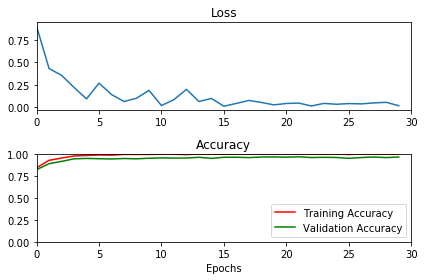

In [21]:
x_axis_epochs = []
for i in range(EPOCHS):
    x_axis_epochs.append(i)

loss_plot = plt.subplot(2, 1, 1)
loss_plot.set_title('Loss')
loss_plot.plot(x_axis_epochs, loss_epochs)
loss_plot.set_xlim([0, EPOCHS])

accuracy_plot = plt.subplot(2, 1, 2)
accuracy_plot.set_title('Accuracy')
accuracy_plot.plot(x_axis_epochs, train_accuracy_epoch, 'r', label='Training Accuracy')
accuracy_plot.plot(x_axis_epochs, val_accuracy_epochs, 'g', label='Validation Accuracy')
accuracy_plot.set_xlabel('Epochs')
accuracy_plot.set_ylim([0, 1.0])
accuracy_plot.set_xlim([0, EPOCHS])
accuracy_plot.legend(loc=4)

plt.tight_layout()
plt.show()

## Evaluate the Model

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I have got 12 images from the internet. The first 6 images have better resolution, and the rest of the images are taken screenshot from driving recorder videos about German road on YouTube.

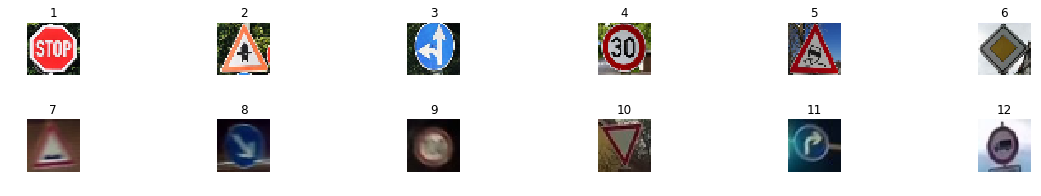

In [23]:
### Load the images and plot them here.
import matplotlib.image as mpimg
import os

new_test_images = []
new_test_images_class = [14, 11, 37, 1, 23, 12, 22, 38, 7, 13, 33, 16]
folder = 'new_test_image'

for filename in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, filename))
    img_resize = cv2.resize(img, (32,32))
    new_test_images.append(img_resize)

plt.figure(figsize=(16,16))
for i in range(len(new_test_images)):
    plt.subplot(len(new_test_images), 6, i+1)
    plt.title(str(i+1)) 
    plt.imshow(new_test_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Image Preprocessing

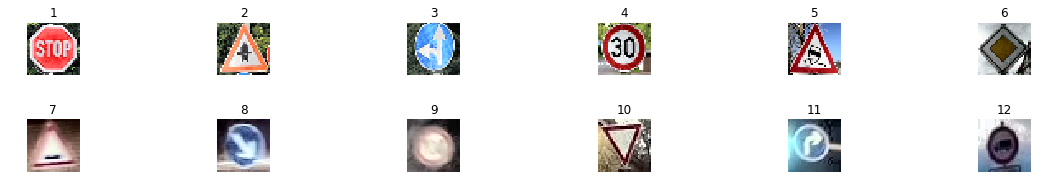

In [24]:
new_test_images_process = []


for x_img in new_test_images:
    if ISGRAY is True:
        x_img_gray = grayscale(x_img)
        x_img_histo_equal = clahe(x_img_gray)        
    else:
        x_img_histo_equal = histogram_equalization(x_img) 
    new_test_images_process.append(x_img_histo_equal)

plt.figure(figsize=(16,16))
for i in range(len(new_test_images_process)):
    plt.subplot(len(new_test_images_process), 6, i+1)
    plt.title(str(i+1)) 
    if ISGRAY is True:
        plt.imshow(new_test_images_process[i].squeeze(), cmap='gray')
    else:
        plt.imshow(new_test_images_process[i])
    
    plt.axis('off')

plt.tight_layout()
plt.show()    

### Predict the Sign Type for Each Image

In [25]:
def predict(img):
    with tf.Session() as sess:
        sess = tf.get_default_session()
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        
        result = sess.run(tf.argmax(logits, 1), feed_dict={x: img, keep_prob : 1.0})
        
#         prob = sess.run(tf.nn.l2_normalize(logits, dim=1), feed_dict={x: img, keep_prob : 1.0})
#         prob = sess.run(logits, feed_dict={x: img, keep_prob : 1.0})   
        prob = sess.run(tf.nn.softmax(logits), feed_dict={x: img, keep_prob : 1.0})   
        
        top_k = sess.run(tf.nn.top_k(prob, k=5))
        
        return result, top_k

In [26]:
predict_label, top_k = predict(new_test_images_process)
print(top_k)

for actual_label, predict_label in zip(new_test_images_class, predict_label):
    if actual_label == predict_label:
        result = 'Correct'
    else:
        result = 'Wrong'
    print("Actual label:", actual_label, "\nPrediction:", predict_label, " ->", result, "\n")

INFO:tensorflow:Restoring parameters from .\lenet
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[14,  0,  1,  2,  3],
       [11,  0,  1,  2,  3],
       [37,  0,  1,  2,  3],
       [ 1,  0,  2,  3,  4],
       [23,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [22,  0,  1,  2,  3],
       [38,  0,  1,  2,  3],
       [ 7,  0,  1,  2,  3],
       [13,  0,  1,  2,  3],
       [33,  0,  1,  2,  3],
       [16,  0,  1,  2,  3]]))
Actual label: 14 
Prediction: 14  -> Correct 

Actual label: 11 
Prediction: 11  -> Correct 

Actual label: 37 
Prediction: 37  -> Correct 

Actual label

#### Show probabilities in bar chart

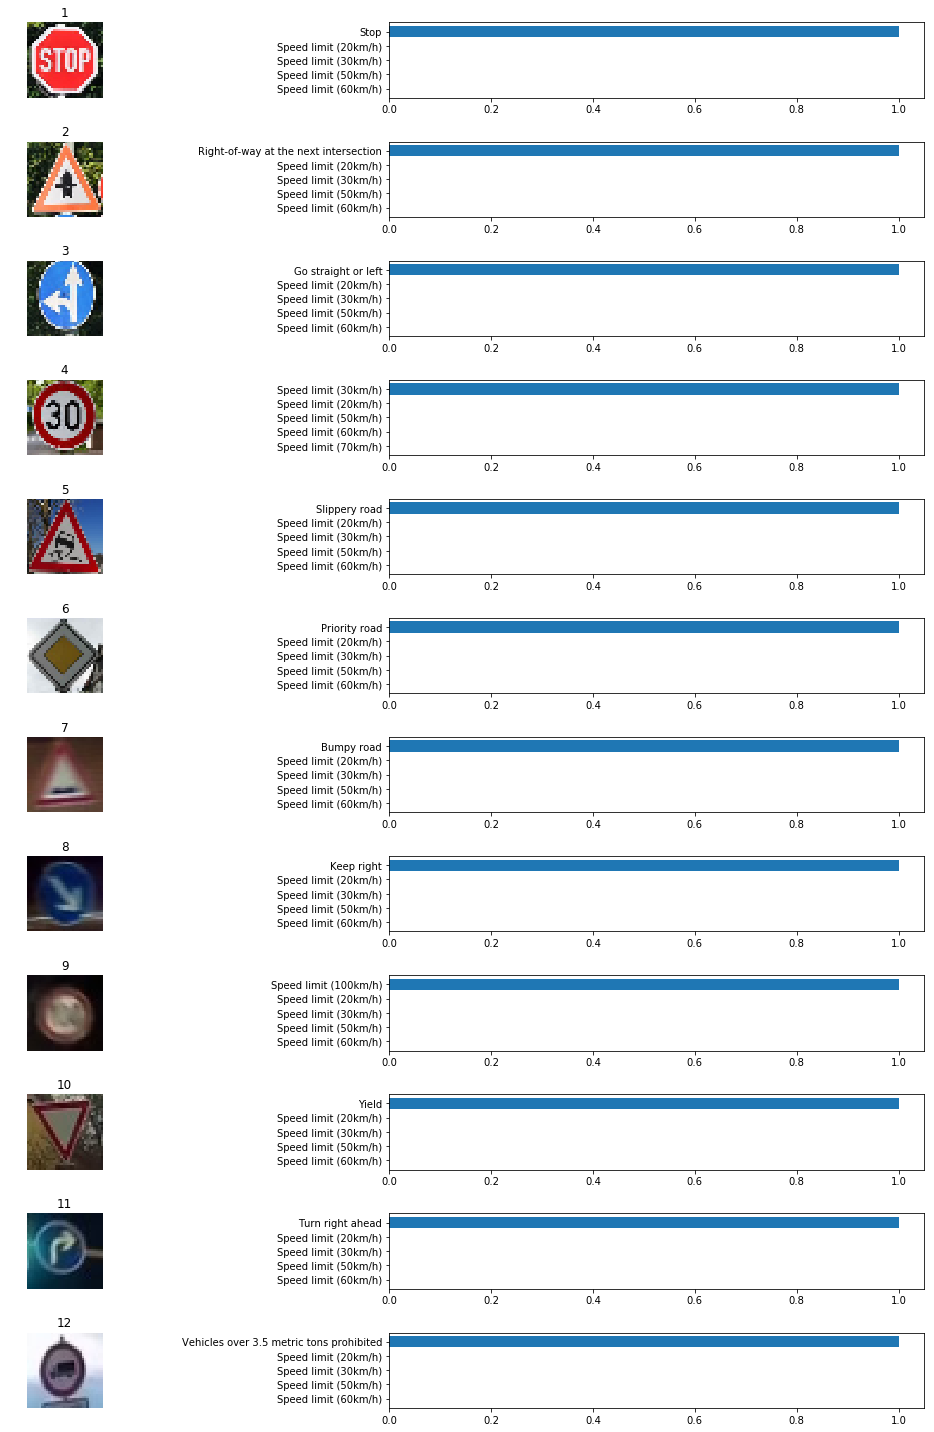

In [27]:
plt.figure(figsize=(16, 20))
for i in range(len(new_test_images)):
    plt.subplot(len(new_test_images), 2, 2*i+1)
    plt.imshow(new_test_images[i]) 
    plt.title(i+1)
    plt.axis('off')
    
    plt.subplot(len(new_test_images), 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top_k.values[i, :])
    show_labels=[signName_list[j] for j in top_k.indices[i]]
    plt.yticks(np.arange(1, 6, 1), show_labels)
    plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Analyze Performance

In [28]:
def evaluate_new(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data, keep_prob : 1.0})
    return accuracy

In [29]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate_new(new_test_images_process, new_test_images_class)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [31]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(25,25))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

#### Select a sample image

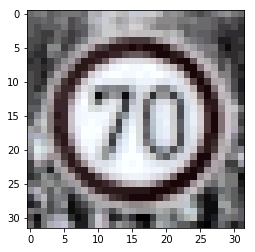

In [32]:
index = random.randrange(len(X_train))
image_input = X_train[index]
if ISGRAY is True:
    plt.imshow(image_input.squeeze(), cmap='gray')
    image_input = image_input.reshape((1, 32, 32, 1)).astype(np.float32)    
else:
    plt.imshow(image_input)
    image_input = image_input.reshape((1, 32, 32, 3)).astype(np.float32)    

#### Activation layer visualization

INFO:tensorflow:Restoring parameters from ./lenet


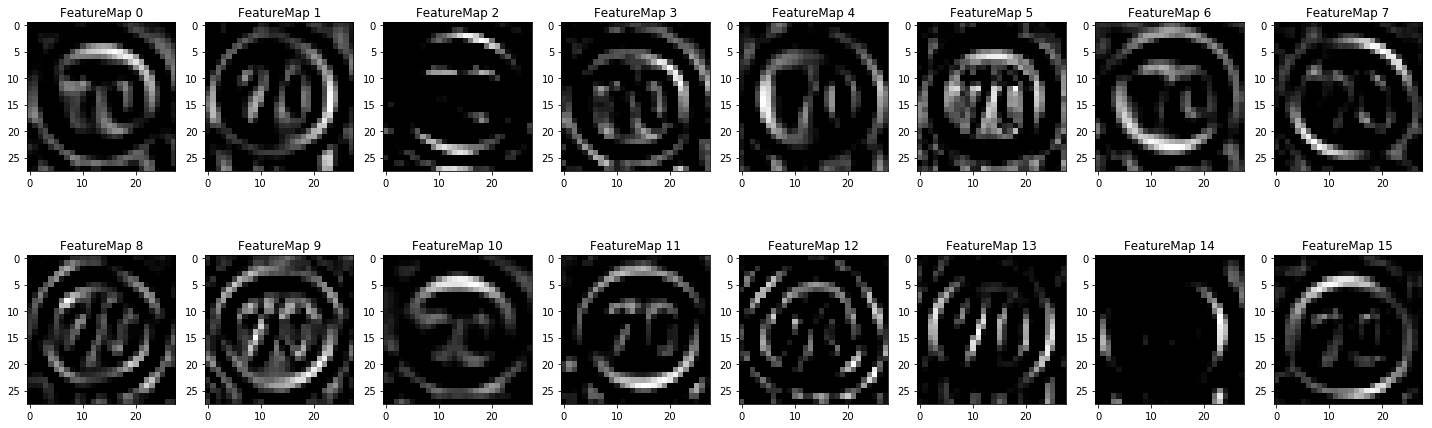

In [33]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet')
    act1 = tf.get_default_graph().get_tensor_by_name("av1:0")
    outputFeatureMap(image_input, act1)    

#### First Convolution layer visualization

INFO:tensorflow:Restoring parameters from .\lenet
conv1 : First layer


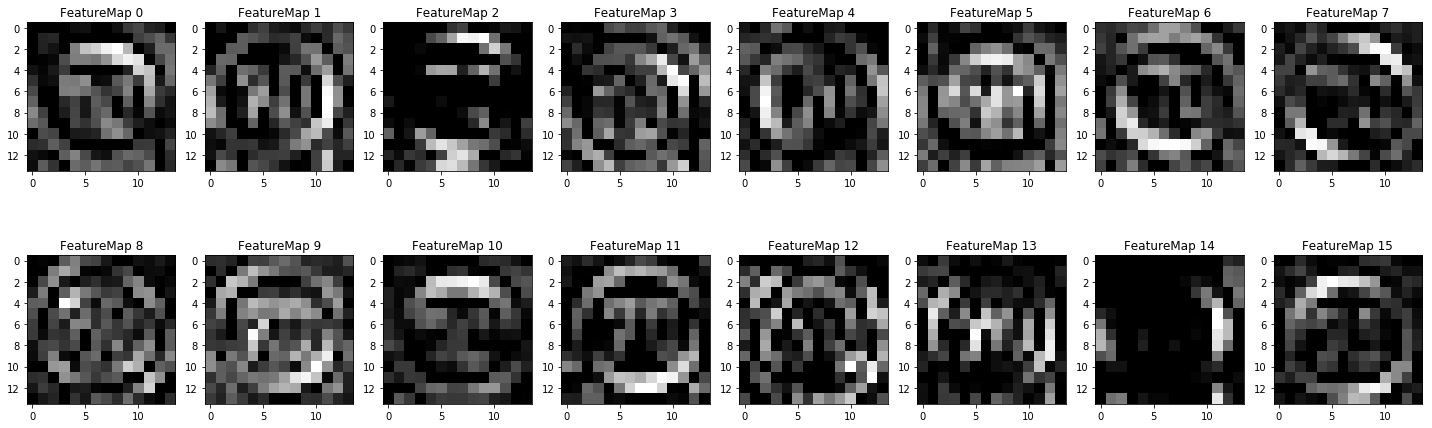

In [34]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("conv1 : First layer")
    outputFeatureMap(image_input, conv1)

#### Second Convolution layer visualization

INFO:tensorflow:Restoring parameters from .\lenet
conv2 : Second layer


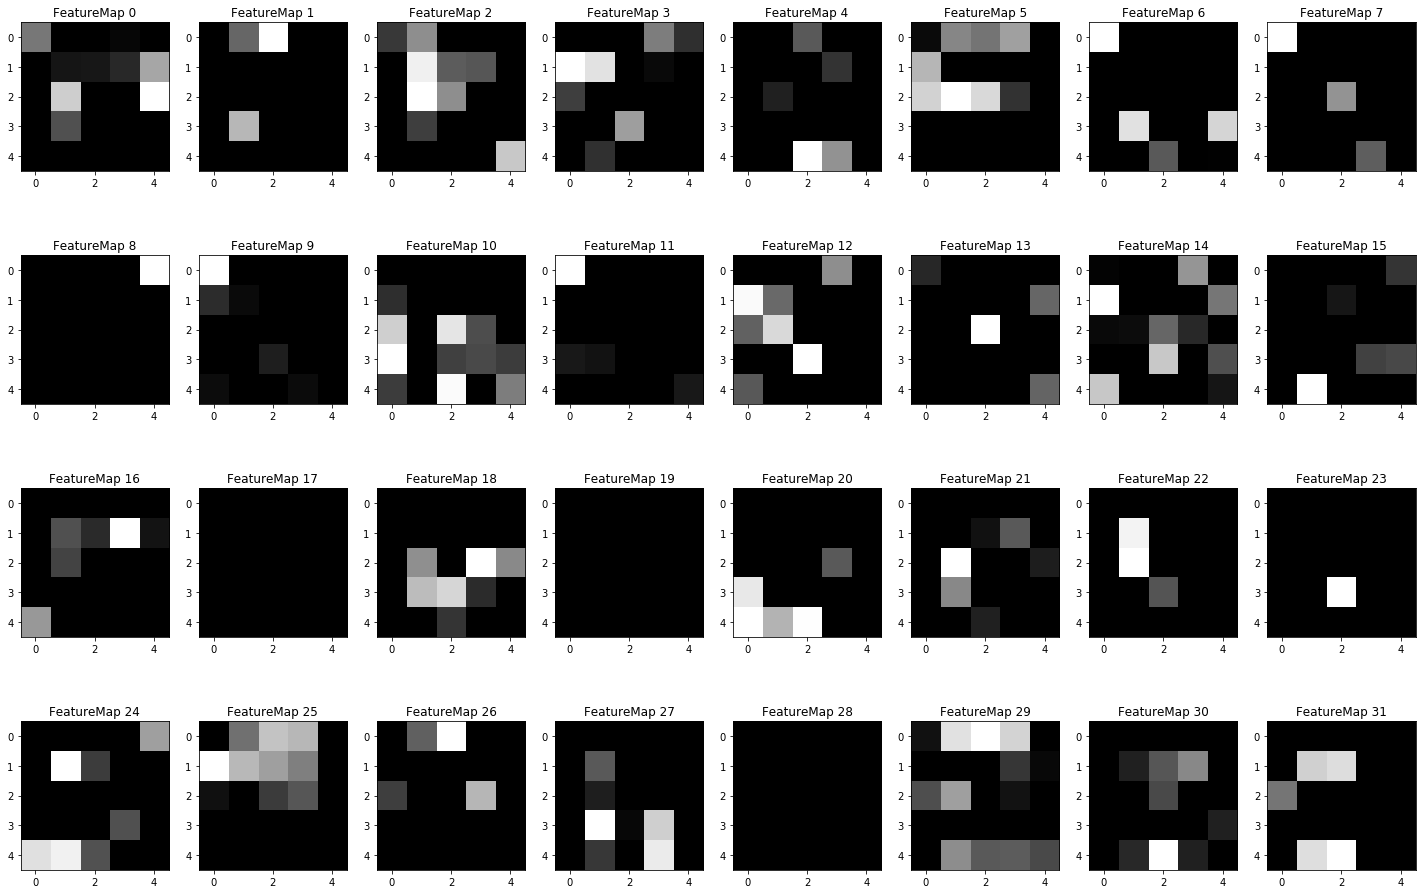

In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    web_classes = sess.run(logits, feed_dict={x: image_input, keep_prob : 1.0})
    print("conv2 : Second layer")
    outputFeatureMap(image_input, conv2)